In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Heatmap Distribution')

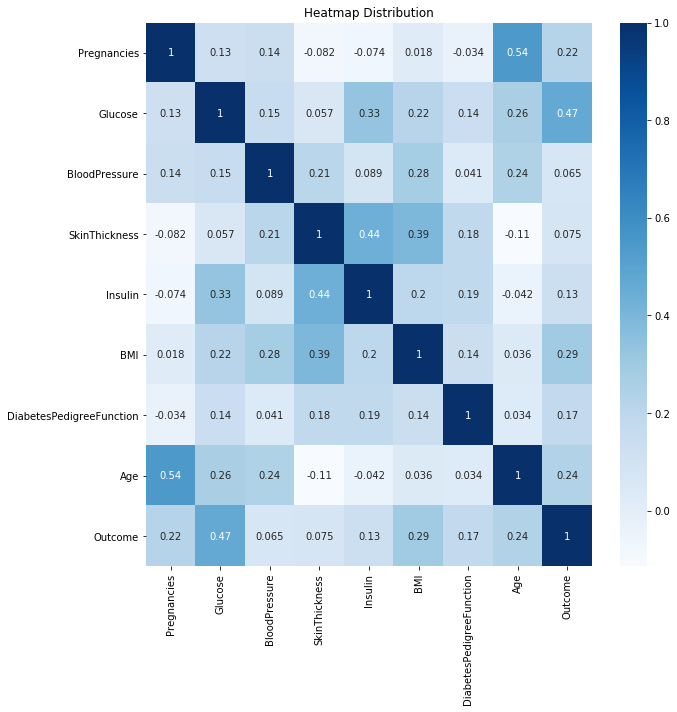

In [5]:
plt.rcParams['figure.figsize'] = (10,10)
sm = sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
sm.set_title('Heatmap Distribution')

Text(0.5, 1.0, 'Age v/s Outcome')

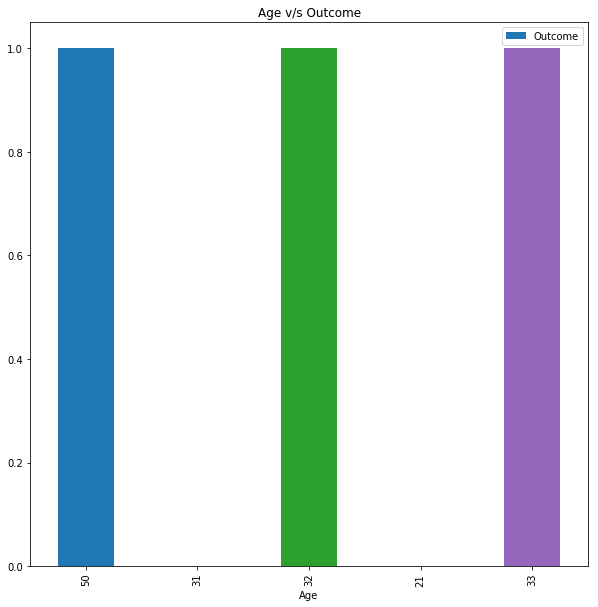

In [6]:
df.head(5).plot.bar(x = 'Age', y = 'Outcome')
plt.title('Age v/s Outcome')

Text(0.5, 1.0, 'Age v/s Outcome')

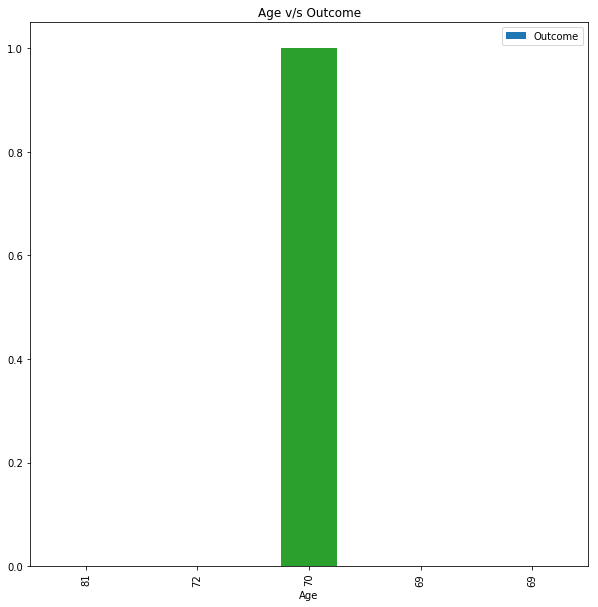

In [7]:
df.sort_values(by = ['Age'], ascending= False).head(5).plot.bar(x = 'Age', y = 'Outcome')
plt.title('Age v/s Outcome')

C:\Users\Rohan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violinplot')

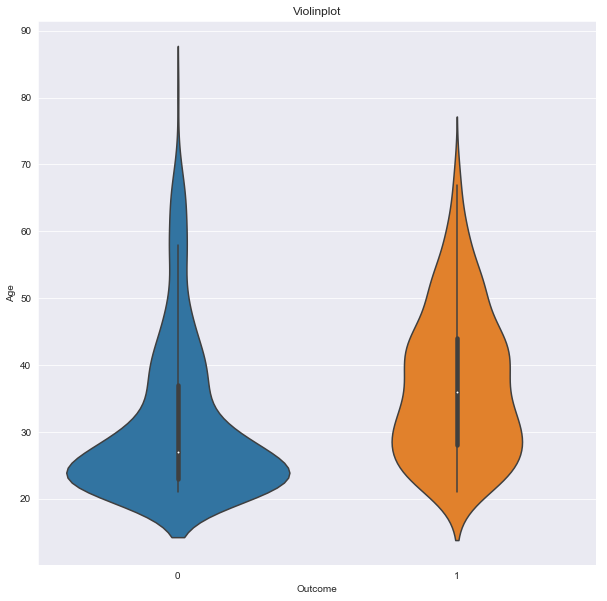

In [8]:
subset = df[df.Outcome.isin(['1', '0'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.violinplot(x = 'Outcome', y = 'Age', data = subset)
ax.set_title('Violinplot')

Text(0.5, 1.0, 'Violinplot')

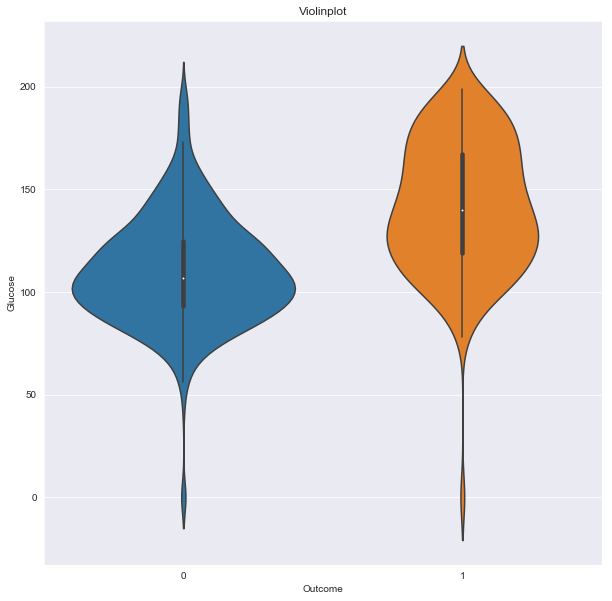

In [9]:
subset = df[df.Outcome.isin(['1', '0'])]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.violinplot(x = 'Outcome', y = 'Glucose', data = subset)
ax.set_title('Violinplot')

Text(0.5, 1.0, 'Stripplot')

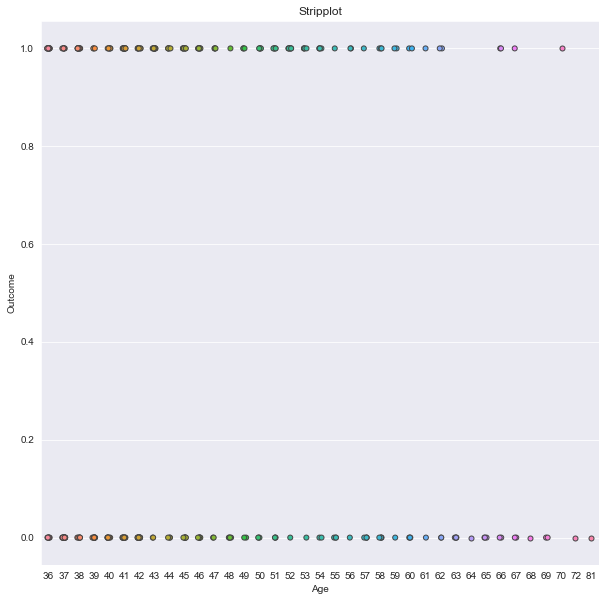

In [11]:
subset = df[df['Age']>35]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.stripplot(x = 'Age', y = 'Outcome', data = subset, jitter = True, linewidth = 1)
ax.set_title('Stripplot')

C:\Users\Rohan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violinplot')

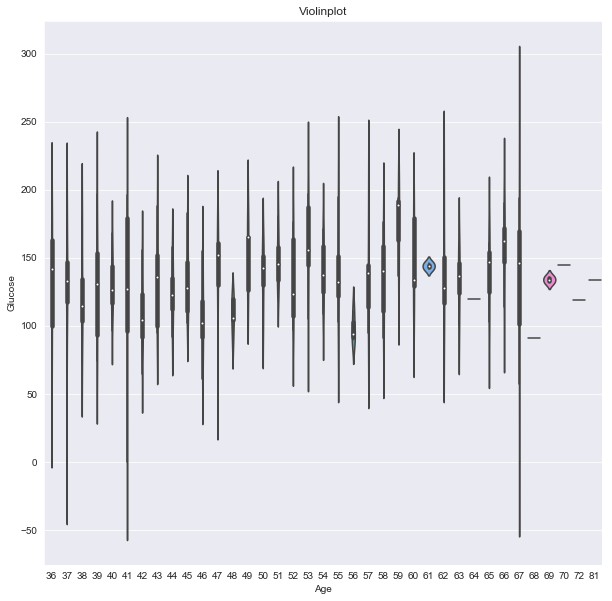

In [12]:
subset = df[df['Age']>35]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax = sns.violinplot(x = 'Age', y = 'Glucose', data = subset)
ax.set_title('Violinplot')

In [13]:
X = df[['Glucose', 'BMI', 'Age']]
Y = df['Outcome']

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(Y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     94.62
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           4.43e-52
Time:                        22:35:37   Log-Likelihood:                -399.34
No. Observations:                 768   AIC:                             806.7
Df Residuals:                     764   BIC:                             825.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9157      0.081    -11.326      0.0

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [20]:
from sklearn.linear_model import LinearRegression
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(Y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           7.36e-55
Time:                        22:44:48   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [22]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [23]:
from sklearn.linear_model import LinearRegression
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(Y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     47.25
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           1.04e-55
Time:                        22:47:13   Log-Likelihood:                -381.92
No. Observations:                 768   AIC:                             779.8
Df Residuals:                     760   BIC:                             817.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [25]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [26]:
from sklearn.linear_model import LinearRegression
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(Y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     54.82
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           2.92e-56
Time:                        22:48:47   Log-Likelihood:                -382.72
No. Observations:                 768   AIC:                             779.4
Df Residuals:                     761   BIC:                             811.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [28]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']]
Y = df['Outcome']

In [29]:
from sklearn.linear_model import LinearRegression
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(Y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     64.92
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           1.76e-56
Time:                        22:50:26   Log-Likelihood:                -384.39
No. Observations:                 768   AIC:                             780.8
Df Residuals:                     762   BIC:                             808.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   